In [73]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings

from matplotlib import pyplot as plt
import seaborn as sns 
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)  # To apply seaborn styles to the plots.


In [74]:
df_train = pd.read_csv('concrete_train.csv')

In [75]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                824 non-null    int64  
 1   cement            824 non-null    float64
 2   slag              824 non-null    float64
 3   flyash            824 non-null    float64
 4   water             824 non-null    float64
 5   superplasticizer  824 non-null    float64
 6   coarseaggregate   824 non-null    float64
 7   fineaggregate     824 non-null    float64
 8   age               824 non-null    int64  
 9   csMPa             824 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 64.5 KB


In [76]:
df_train.duplicated(keep='last')

0      False
1      False
2      False
3      False
4      False
       ...  
819    False
820    False
821    False
822    False
823    False
Length: 824, dtype: bool

In [77]:
df_train.describe()

,Id,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,513.847087,283.360801,74.371602,53.160801,181.797087,6.163956,973.548544,772.107403,44.661408,35.857864
std,296.786779,107.536404,86.977784,64.000646,21.321905,5.967258,78.694630,80.984717,60.475702,16.865099
min,0.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,251.750000,192.000000,0.000000,0.000000,164.900000,0.000000,932.000000,726.775000,12.250000,23.685000
50%,513.500000,275.100000,22.000000,0.000000,185.350000,6.100000,968.000000,778.500000,28.000000,34.080000
75%,770.250000,359.900000,144.775000,118.300000,192.000000,10.125000,1040.600000,821.250000,56.000000,45.862500
max,1028.000000,540.000000,359.400000,195.000000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [28]:
df_train.drop(columns=['Id'], axis=1, inplace=True)

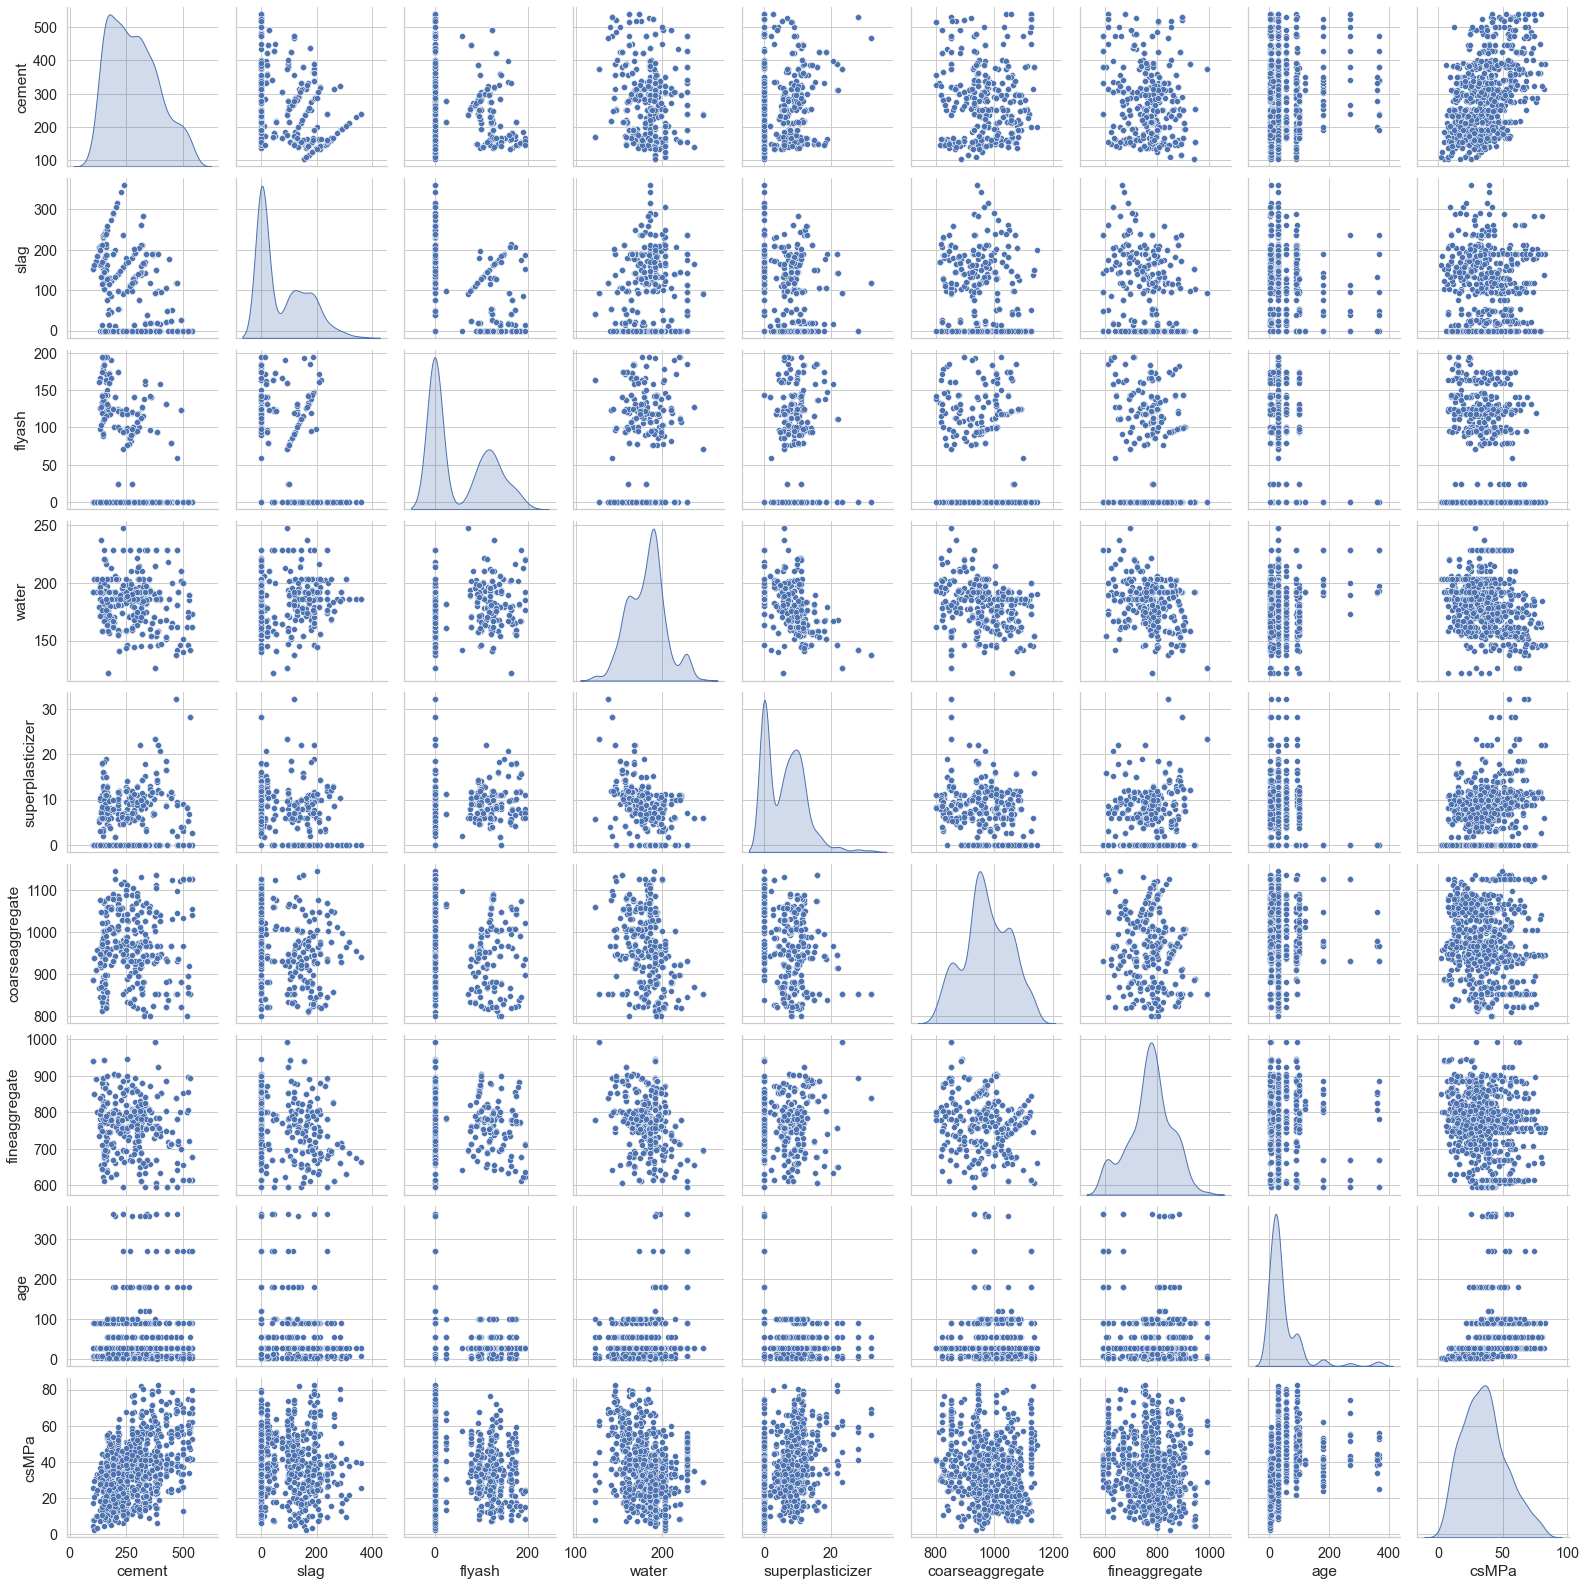

In [29]:
sns.pairplot(df_train,diag_kind='kde')

<AxesSubplot:>

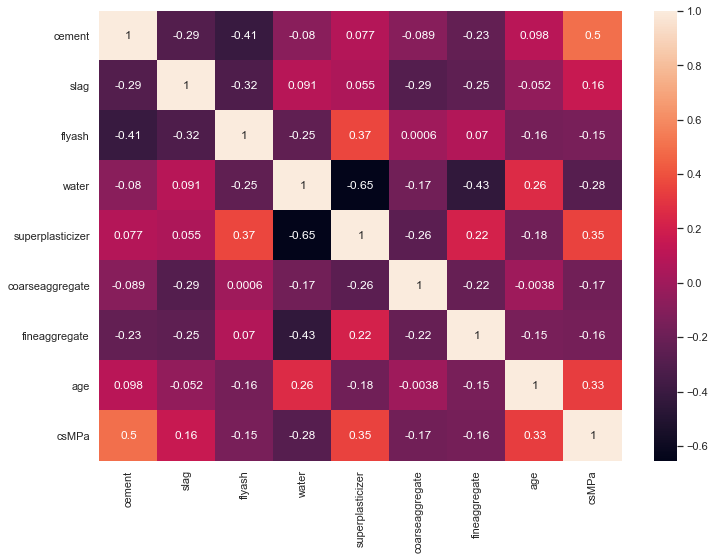

In [44]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_train.corr(),annot=True)

In [31]:
import pandas as pd
from pandas_profiling import ProfileReport
design_report = ProfileReport(df_train)
design_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

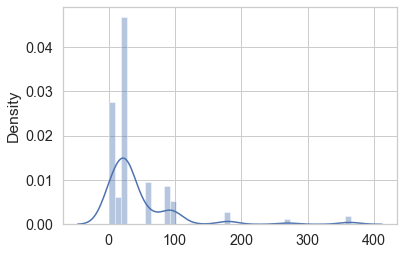

In [32]:
sns.distplot(df_train[['age']])

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

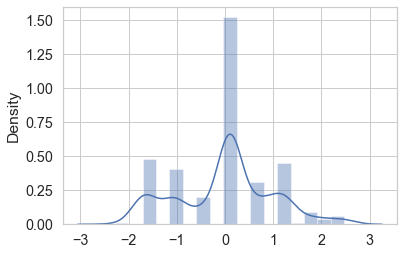

In [33]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedage = pt.fit_transform(df_train[['age']])
sns.distplot(transformedage)

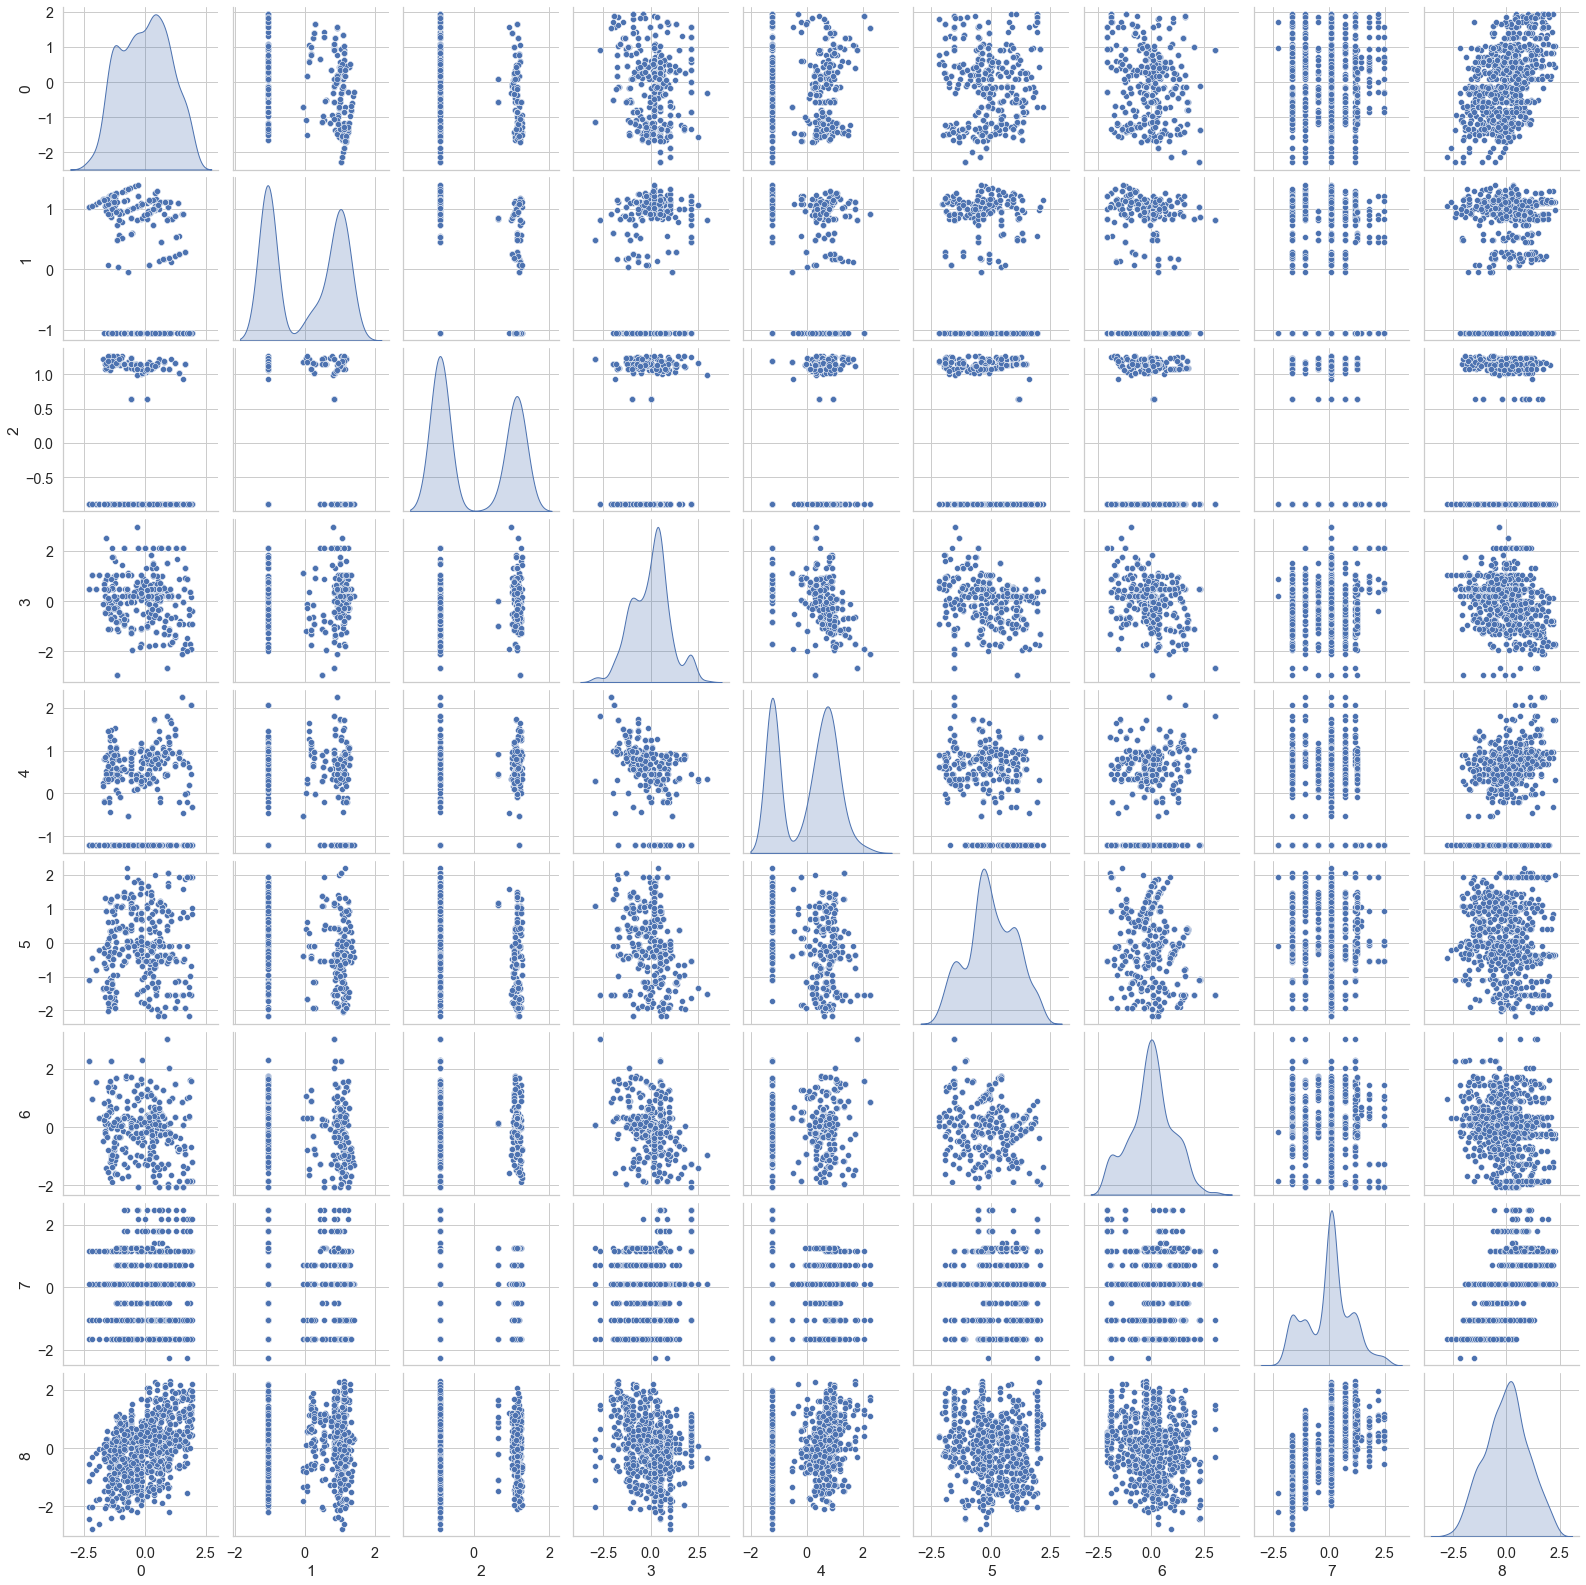

In [36]:
sns.pairplot(pd.DataFrame(pt.fit_transform(df_train)), diag_kind='kde')

<AxesSubplot:>

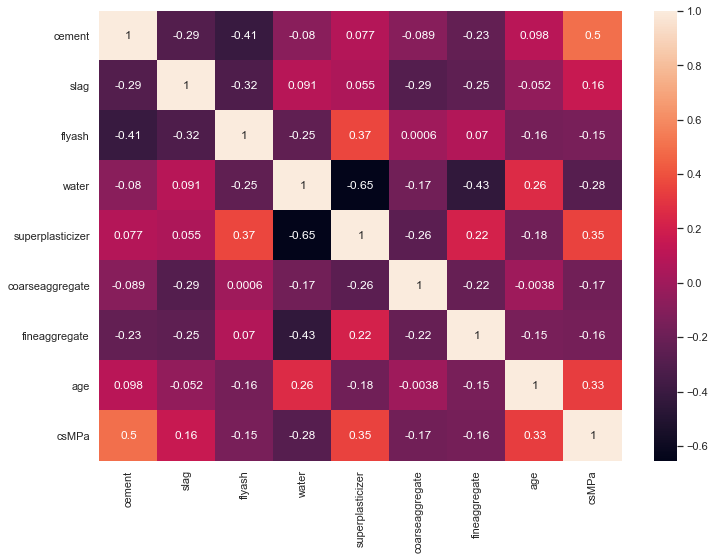

In [45]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_train.corr(), annot=True)


# Applying model

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df_train.drop('csMPa', axis=1)
y = df_train[['csMPa']]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.20, random_state=10)
sc=StandardScaler()
scaledXtrain = sc.fit_transform(X_train)
scaledXtest = sc.transform(X_test)
lr = LinearRegression()
lr.fit(scaledXtrain,y_train)
print("Training R2")
print(lr.score(scaledXtrain,y_train))
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(scaledXtest,y_test))

Training R2
0.5969052561249677
-101927.35222323502
Testing R2
0.6587254467410004


In [51]:
lr.coef_

array([[11.87238553,  8.61507781,  4.25227948, -4.02182151,  1.54211073,
         0.68938409,  0.92837682,  7.19560427]])

In [53]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
X = df_train.drop('csMPa', axis=1)
y = df_train[['csMPa']]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.20, random_state=10)
pipe = Pipeline((
("sc",StandardScaler()),
("lr", LinearRegression()),
))
pipe.fit(X_train,y_train)
print("Training R2")
print(pipe.score(X_train,y_train))
print("Testing R2")
print(pipe.score(X_test,y_test))
scoresdt = cross_val_score(pipe,X_train,y_train,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.5969052561249677
Testing R2
0.6587254467410004
[0.54423339 0.59719262 0.48783471 0.53964843 0.57694917 0.48220447
 0.69071001 0.56281775 0.58350198 0.63502669]
Average R2
0.5700119214872685


In [54]:
pipe['lr'].coef_

array([[11.87238553,  8.61507781,  4.25227948, -4.02182151,  1.54211073,
         0.68938409,  0.92837682,  7.19560427]])

In [55]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
X = df_train.drop('csMPa', axis=1)
y = df_train[['csMPa']]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.20, random_state=10)
pipe = Pipeline((
("pt",PowerTransformer()),
("lr", LinearRegression()),
))
pipe.fit(X_train,y_train)
print("Training R2")
print(pipe.score(X_train,y_train))
print("Testing R2")
print(pipe.score(X_test,y_test))
scoresdt = cross_val_score(pipe,X_train,y_train,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.8039565566821434
Testing R2
0.7899392345356315
[0.8197865  0.77284003 0.77117937 0.7488773  0.82390915 0.70091859
 0.81206839 0.85021804 0.84253379 0.79317466]
Average R2
0.7935505815397425


In [57]:
y_test_pred = lr.predict(X_train)

In [58]:
y_test_pred

array([[7700.16118307],
       [4684.09702167],
       [4165.56262065],
       [3968.30002142],
       [5313.73540355],
       [4070.72038152],
       [5171.35033736],
       [4866.62516273],
       [3999.12725254],
       [5630.05523368],
       [4460.64284199],
       [4805.81872075],
       [4369.5432624 ],
       [5749.82117377],
       [7501.16400975],
       [5696.44572046],
       [4210.87558749],
       [4477.66748582],
       [6048.21044802],
       [4937.49924448],
       [4200.53069921],
       [7074.66296987],
       [7433.47911874],
       [6838.24531484],
       [7807.71871908],
       [4944.13091151],
       [6338.18580892],
       [4404.49393623],
       [5289.41946829],
       [4198.55637741],
       [4494.98709286],
       [3292.33326769],
       [3979.06363929],
       [4583.93753293],
       [4338.14000129],
       [6519.70555477],
       [4206.04963058],
       [4955.15574429],
       [4542.36423696],
       [6385.61151955],
       [4621.74973534],
       [5351.866

In [64]:
df_test = pd.read_csv('concrete_test.csv')

In [65]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                206 non-null    int64  
 1   cement            206 non-null    float64
 2   slag              206 non-null    float64
 3   flyash            206 non-null    float64
 4   water             206 non-null    float64
 5   superplasticizer  206 non-null    float64
 6   coarseaggregate   206 non-null    float64
 7   fineaggregate     206 non-null    float64
 8   age               206 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 14.6 KB


In [66]:
df_sample =  df_test[['Id']]

In [67]:
df_test.drop(columns=['Id'], axis=1, inplace=True)
df_test = sc.fit_transform(df_test)

In [68]:
sam_pred = lr.predict(df_test)

In [70]:
submission = pd.DataFrame()
submission['Id'] = df_sample['Id']
submission['csMPa'] = sam_pred
submission.to_csv('submission.csv', index=False)

In [72]:
submission.shape

(206, 2)

# Completed with Linear Regression 